In [1]:
from openeo_core import DataCube
from dask.diagnostics import ProgressBar

In [2]:
cube = DataCube.load_collection(
    "sentinel-2-l2a",
    spatial_extent={"west": -106.5, "south": 35.0, "east": -106.4, "north": 35.1},
    temporal_extent=("2023-05-01", "2023-08-31"),
    bands=["red", "nir"],
    properties={"eo:cloud_cover": {"lt": 50}},
)

In [3]:
cube.data

<xarray.DataArray 'stackstac-078920aa18d66edb6bd8cf8b05a382cb' (time: 43,
                                                                bands: 2,
                                                                latitude: 1124,
                                                                longitude: 929)> Size: 718MB
dask.array<fetch_raster_window, shape=(43, 2, 1124, 929), dtype=float64, chunksize=(1, 1, 1024, 929), chunktype=numpy.ndarray>
Coordinates: (12/54)
  * time                                     (time) datetime64[ns] 344B 2023-...
    id                                       (time) <U24 4kB 'S2A_13SCU_20230...
  * bands                                    (bands) <U3 24B 'red' 'nir'
  * longitude                                (longitude) float64 7kB 3.631e+0...
  * latitude                                 (latitude) float64 9kB 3.885e+06...
    s2:dark_features_percentage              (time) float64 344B 0.0526 ... 0...
    ...                                       ...
    title                                    (bands) <U20 160B 'Red (band 4) ...
    gsd                                      int64 8B 10
    common_name                              (bands) <U3 24B 'red' 'nir'
    center_wavelength                        (bands) float64 16B 0.665 0.842
    full_width_half_max                      (bands) float64 16B 0.038 0.145
    epsg                                     int64 8B 32613
Attributes:
    spec:        RasterSpec(epsg=32613, bounds=(363110.0, 3873930.0, 372400.0...
    crs:         epsg:32613
    transform:   | 10.00, 0.00, 363110.00|\n| 0.00,-10.00, 3885170.00|\n| 0.0...
    resolution:  10.0

In [4]:
result = (
    cube
    .resample_spatial(resolution=60)
    .aggregate_temporal_period(period="month", reducer="median")
    .ndvi(nir="nir", red="red")
)


In [5]:
result.data

<xarray.DataArray 'ndvi' (time: 4, latitude: 188, longitude: 155)> Size: 466kB
array([[[0.9145107 , 0.21046509, 0.84826326, ...,        nan,
                nan,        nan],
        [0.44435796, 0.27058822, 0.41511288, ...,        nan,
                nan,        nan],
        [0.24528302, 0.2542955 , 0.24424778, ...,        nan,
                nan,        nan],
        ...,
        [0.17671958, 0.19058296, 0.24602206, ..., 0.47798064,
         0.4660734 , 0.46234313],
        [0.19381689, 0.16179335, 0.18858562, ..., 0.33911538,
         0.5613207 , 0.5995175 ],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan, 0.20710057,        nan, ...,        nan,
                nan,        nan],
        [0.58143604, 0.2226656 , 0.3678756 , ...,        nan,
                nan,        nan],
        [0.28502417, 0.27289551, 0.27012524, ..., 0.9501467 ,
                nan,        nan],
...
        [0.1270661 , 0.11840563, 0.14484361, ..., 0.47124386,
         0.49449542, 0.48407075],
        [0.12055912, 0.10130879, 0.12923467, ..., 0.31885555,
         0.56678337, 0.56582916],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan, 0.19105431,        nan, ...,        nan,
                nan,        nan],
        [0.52103555, 0.25780553, 0.42537314, ...,        nan,
                nan,        nan],
        [0.30136985, 0.14528465, 0.28214288, ...,        nan,
                nan,        nan],
        ...,
        [0.15143606, 0.18541999, 0.1758242 , ..., 0.53643966,
         0.64931506, 0.5495251 ],
        [0.14160582, 0.11884755, 0.10334346, ..., 0.34415027,
         0.55313355, 0.7905074 ],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], shape=(4, 188, 155), dtype=float32)
Coordinates:
  * latitude     (latitude) float64 2kB 3.885e+06 3.885e+06 ... 3.874e+06
  * longitude    (longitude) float64 1kB 3.631e+05 3.632e+05 ... 3.724e+05
    spatial_ref  int64 8B 0
  * time         (time) <U7 112B '2023-05' '2023-06' '2023-07' '2023-08'

In [6]:
with ProgressBar():
    ndvi = result.compute()  

In [7]:
ndvi.data

<xarray.DataArray 'ndvi' (time: 4, latitude: 188, longitude: 155)> Size: 466kB
array([[[0.9145107 , 0.21046509, 0.84826326, ...,        nan,
                nan,        nan],
        [0.44435796, 0.27058822, 0.41511288, ...,        nan,
                nan,        nan],
        [0.24528302, 0.2542955 , 0.24424778, ...,        nan,
                nan,        nan],
        ...,
        [0.17671958, 0.19058296, 0.24602206, ..., 0.47798064,
         0.4660734 , 0.46234313],
        [0.19381689, 0.16179335, 0.18858562, ..., 0.33911538,
         0.5613207 , 0.5995175 ],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan, 0.20710057,        nan, ...,        nan,
                nan,        nan],
        [0.58143604, 0.2226656 , 0.3678756 , ...,        nan,
                nan,        nan],
        [0.28502417, 0.27289551, 0.27012524, ..., 0.9501467 ,
                nan,        nan],
...
        [0.1270661 , 0.11840563, 0.14484361, ..., 0.47124386,
         0.49449542, 0.48407075],
        [0.12055912, 0.10130879, 0.12923467, ..., 0.31885555,
         0.56678337, 0.56582916],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan, 0.19105431,        nan, ...,        nan,
                nan,        nan],
        [0.52103555, 0.25780553, 0.42537314, ...,        nan,
                nan,        nan],
        [0.30136985, 0.14528465, 0.28214288, ...,        nan,
                nan,        nan],
        ...,
        [0.15143606, 0.18541999, 0.1758242 , ..., 0.53643966,
         0.64931506, 0.5495251 ],
        [0.14160582, 0.11884755, 0.10334346, ..., 0.34415027,
         0.55313355, 0.7905074 ],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], shape=(4, 188, 155), dtype=float32)
Coordinates:
  * latitude     (latitude) float64 2kB 3.885e+06 3.885e+06 ... 3.874e+06
  * longitude    (longitude) float64 1kB 3.631e+05 3.632e+05 ... 3.724e+05
    spatial_ref  int64 8B 0
  * time         (time) <U7 112B '2023-05' '2023-06' '2023-07' '2023-08'

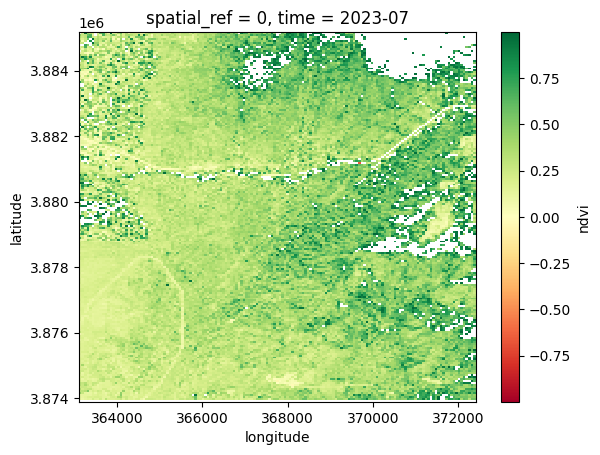

In [8]:
# Plot NDVI spatially for this time step
ndvi.data[2].plot(cmap="RdYlGn")